In [1]:
import batman
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
params = batman.TransitParams()
params.t0 = 0.03
params.per = 10.0
params.rp = 0.1
params.a = 15.0
params.inc = 88.0
params.ecc = 0.05
params.w = 90.0
params.u = [0.1, 0.3]
params.limb_dark = "quadratic"

In [27]:
t = np.linspace(-0.5, 0.5, 100)
m = batman.TransitModel(params, t)
flux = m.light_curve(params)

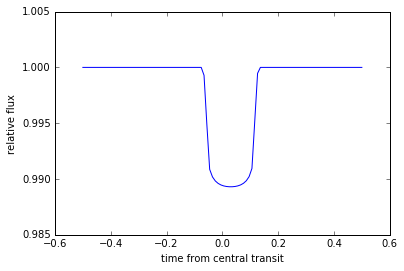

In [28]:
plt.plot(t, flux)
plt.xlabel("time from central transit")
plt.ylabel("relative flux")
plt.ylim(0.985, 1.005)
plt.show()

In [29]:
from simulate import simulate
times, noise = simulate()
m = batman.TransitModel(params, times)

# generate simulated data!
params.rp = 1.0
flux = m.light_curve(params)
simulateddata = flux*noise

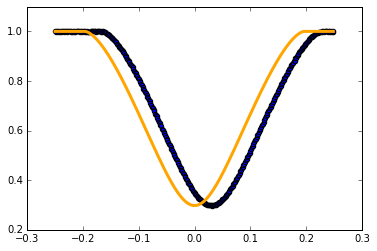

In [30]:

plt.scatter(times, simulateddata)

data = np.array([times, simulateddata])

# generate some model
params.t0 = 0.0
model = m.light_curve(params)
plt.plot(times, model, color='orange', linewidth=3)

theory = np.array([times, model])

In [6]:
print np.shape(data)
print np.shape(theory)

(2, 360)
(2, 360)


In [7]:
np.append?

In [7]:
def chisqa (data, model):
    chi = 0
    
    for i in range(len(data)):
        num = (data[i]-model[i])**2
        denom = model[i]
        summ = num/denom
        chi = chi + summ
    chisum = np.sum(chi)
    return chisum
    

In [8]:
print chisqa (data, theory)

50.3055084419


In [9]:
import scipy.optimize as spicy

In [48]:
spicy.leastsq?

In [10]:
t00 = np.arange(0, 100, 0.1)
print t00

[  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3
   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5
   9.6   9.7   9.8   9.9  10.   10.1  10.2  10.3  10.4  10.5  10.6  10.7
  10.8  10.9  11.   11.1  11.2  11.3  11.4  11.5  11.6  11.7  11.8  11.9
  12.   12.1  12.2  12.3  12.4  12.5  12.6  12.7  12.8  12.9  13.   13.1
  13.2  13.3  13.4  13.5  13.6  13.7  13.8  13.9  14.   14.1  14.2  14.3
  14.4  14.5  14.6  14.7  14.8  14.9  15.   15.1  15.2  15.3  15.4  15.5
  15.6  15.7  15.8  15.9  16.   16.1  16.2  16.3  1

In [ ]:
def calcchisqa (data):
    model = np.array([range(len(data[0])), range(len(data[1]))])
    for i in range(len(model[1])):
        firstchi = chisqa(data, model[i])
        

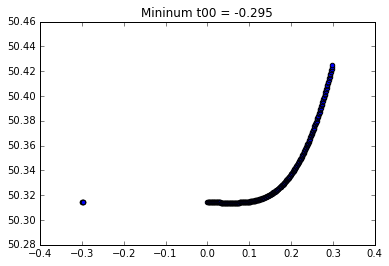

In [46]:
'''params = batman.TransitParams()
params.t0 = 0.0
params.per = 10.0
params.rp = 0.1
params.a = 15.0
params.inc = 88.0
params.ecc = 0.05
params.w = 90.0
params.u = [0.1, 0.3]
params.limb_dark = "quadratic"

t = np.linspace(-0.5, 0.5, 100)
m = batman.TransitModel(params, t)
flux = m.light_curve(params)'''


plotting = False


t00 = np.arange(-0.3, 0.3, 0.001)
chiSq = np.array([])
for i in t00:

    # set the model t0 to one value of t00
    params.rp = i
    modelflux = m.light_curve(params)
    chiSq = np.append(chiSq, chisqa(simulateddata, modelflux))

    if plotting:
        plt.plot(times, modelflux, color='orange', linewidth=3)
        plt.scatter(times, simulateddata)
        plt.title("t0 = {}, chi^2 = {}".format(i, chiSq[-1]))
        plt.show()
plt.scatter(t00, chiSq)
mint00 = t00[np.argmin(chiSq)]
plt.title("Mininum t00 = {}".format(mint00))



    